# Dérivation numérique

La notion de [dérivée](../analyse/derivation) peut être manipulée symboliquement dans des librairies, langages ou programme spécifique. Cette méthode de différentiation nécessite de connaître la fonction à dériver. Dans la pratique, il arrive souvent que l'on n'ait pas d'expression symbolique pour la fonction que l'on souhaite étudier, mais que l'on ait un ensemble de points qui représente cette fonction. Pour obtenir la notion de dérivée, on utilise le proxy de la [différentiation numérique](https://fr.wikipedia.org/wiki/D%C3%A9rivation_num%C3%A9rique), que l'on survole ici.

## Plusieurs définition de la dérivée numérique

Si la notion de [dérivée symbolique](../analyse/derivation) se définit par la limite de la fonction avec elle-même en deux points proches, cette notion de proximité n'existe plus du tout lorsque l'on étudie une fonction à partir de quelques exemples numériques de ses points. il n'existe alors pas de définition unique de la dérivée numérique d'une fonction.

Voici donc répétées les définitions de la dérivées d'une fonction d'une seule variable, et leurs correspondances numériques : 

$$\begin{align}
\left.\frac{df}{dx}\right|_{x=x_{0}} &= \lim_{\epsilon\rightarrow0}\frac{f\left(x_{0}+\epsilon\right)-f\left(x_{0}\right)}{\epsilon}\rightarrow f_{F}^{\prime}\left(x_{0}\right)=\frac{f\left(x_{0}+h\right)-f\left(x_{0}\right)}{h}
\\ &= \lim_{\epsilon\rightarrow0}\frac{f\left(x_{0}\right)-f\left(x_{0}-\epsilon\right)}{\epsilon}\rightarrow f_{B}^{\prime}\left(x_{0}\right)=\frac{f\left(x_{0}\right)-f\left(x_{0}-h\right)}{h}
\\ &= \lim_{\epsilon\rightarrow0}\frac{f\left(x_{0}+\epsilon\right)-f\left(x_{0}-\epsilon\right)}{2\epsilon}\rightarrow f_{C}^{\prime}\left(x_{0}\right)=\frac{f\left(x_{0}+h\right)-f\left(x_{0}-h\right)}{2h}
\end{align}$$

Chacune de ces versions numériques porte un nom propre : 

 - Forward difference formula, $f_{F}^{\prime}\left(x_{0}\right)$, 
 - Backward difference formula: $f_{B}^{\prime}\left(x_{0}\right)$,
 - Central difference formula: $f_{C}^{\prime}\left(x_{0}\right)$,

avec $f_{C}^{\prime}\left(x_{0}\right)=\frac{f_{F}^{\prime}\left(x_{0}\right)+f_{B}^{\prime}\left(x_{0}\right)}{2}$ la moyenne algébrique des deux précédentes différences.

Numériquement, étant donné une série d'absisses $x_i$ et d'ordonnées $y_i$, on calcule les différentes dérivées numériques comme 

$$\begin{align}
\left(y^\prime_F\right)_i &= \frac{y_{i+1}-y_{i}}{x_{i+1}-x_{i}} \\
\left(y^\prime_B\right)_i &= \frac{y_{i}-y_{i-1}}{x_{i}-x_{i-1}} \\
\left(y^\prime_C\right)_i &= \frac{y_{i+1}-y_{i-1}}{x_{i+1}-x_{i-1}} \\
\end{align}$$

ces dérivées numériques étant supposées être associées au point $x_i$. On voit donc que l'on perd des points par rapport aux séries envoyées aux algorithmes de calcul : on ne connaîtra pas l'approximation numérique de dérivée _forward_ (_backward_, respectivement) au dernier (premier) point, et on ne connaîtra pas l'approximation numérique de la dérivée par différence centrale pour les deux points initial et final de la série des absisses.

## Formule combinée de dérivée numérique

On peut proposer également des mixture des définitions précédentes, par exemple sous la forme de moyennes des distance entre les ordonnées pondérées par les distances des absisses. Si l'on note $w_{i} = x_{i+1}-x_{i}$, on peut proposer

$$\begin{align}
\left(y_{M}^{\prime}\right)_{i}&=\frac{w_{i-1}\left(y_{F}^{\prime}\right)_{i}+w_{i}\left(y_{B}^{\prime}\right)_{i}}{w_{i-1}+w_{i}}\\&=\frac{x_{i}-x_{i-1}}{x_{i+1}-x_{i-1}}\frac{y_{i+1}-y_{i}}{x_{i+1}-x_{i}}+\frac{x_{i+1}-x_{i}}{x_{i+1}-x_{i-1}}\frac{y_{i}-y_{i-1}}{x_{i}-x_{i-1}}
\end{align}$$

Le choix 

$$
\left(y_{M^\prime}^{\prime}\right)_{i}=\frac{w_{i}\left(y_{F}^{\prime}\right)_{i}+w_{i-1}\left(y_{B}^{\prime}\right)_{i}}{w_{i-1}+w_{i}}=\frac{y_{i+1}-y_{i-1}}{x_{i+1}-x_{i-1}}
$$

semblerait plus naturel, mais d'une part il revient à calculer $\left(y^\prime_C\right)$, et il est en fait moins précis.

La comparaison des différentes stratégies de calcul des dérivées peut se faire simplement à l'aide des [fonctions trigonométriques](https://fr.wikipedia.org/wiki/Trigonom%C3%A9trie), puisque l'on sait (par exemple) que $\cos^\prime = -\sin$. On peut donc tracer les dérivées numériques et la dérivée connue sur le même graphique.

In [6]:
from random import choice
import math

from matplotlib import colormaps
import matplotlib.pyplot as plt
import differentiation as diff # internal module

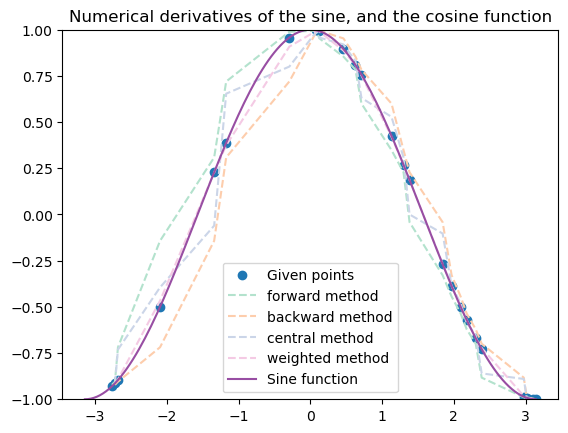

In [14]:
N = 150
t = [-math.pi*(1-n/N)+math.pi*n/N for n in range(N+1)]
tchoice = sorted([choice(t) for _ in range(25)])
while len(tchoice) != len(set(tchoice)):
    tchoice = sorted([choice(t) for _ in range(25)])
sine = [math.sin(t) for t in tchoice]

functions = {'forward': diff.forward(tchoice, sine),
             'backward': diff.backward(tchoice, sine),
             'central': diff.central(tchoice, sine),
             'weighted': diff.weighted(tchoice, sine)}

fig = plt.figure()
plt.scatter(tchoice, [math.cos(t) for t in tchoice],
           label='Given points')
i = 0
for name, values in functions.items():
    plt.plot(values[0], values[1], 
             color=colormaps['Pastel2'](i),
             linestyle='dashed',
             label=f"{name} method")
    i += 1
N = 150
x = [-math.pi*(1-n/N)+math.pi*n/N for n in range(N+1)]
plt.plot(x, [math.cos(t) for t in x], 
         color=colormaps['Set1'](3),
         label="Sine function")
plt.ylim([-1,1])
plt.title(f"Numerical derivatives of the sine, and the cosine function")
plt.legend()
plt.show()

Évidemment, plus on rajoutera de points dans la fonction initiale, plus la dérivée numérique ressemblera à la dérivée exacte.

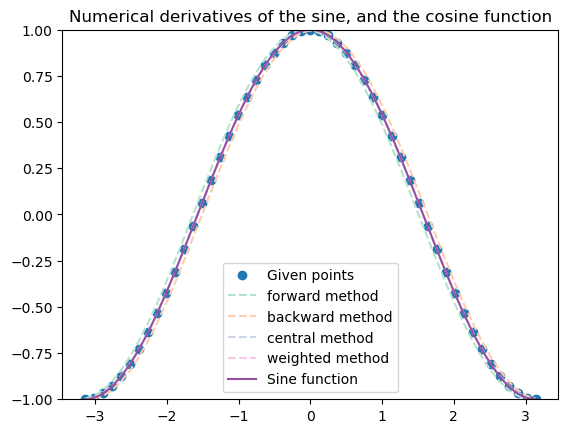

In [15]:
N = 50
t = [-math.pi*(1-n/N)+math.pi*n/N for n in range(N+1)]
sine = [math.sin(t) for t in t]

functions = {'forward': diff.forward(t, sine),
             'backward': diff.backward(t, sine),
             'central': diff.central(t, sine),
             'weighted': diff.weighted(t, sine)}

fig = plt.figure()
i = 0
plt.scatter(t, [math.cos(t) for t in t],
            label='Given points')
for name, values in functions.items():
    plt.plot(values[0], values[1], 
             color=colormaps['Pastel2'](i),
             linestyle='dashed',
             label=f"{name} method")
    i += 1
N = 150
x = [-math.pi*(1-n/N)+math.pi*n/N for n in range(N+1)]
plt.plot(x, [math.cos(t) for t in x], 
         color=colormaps['Set1'](3),
         label="Sine function")
plt.ylim([-1,1])
plt.title(f"Numerical derivatives of the sine, and the cosine function")
plt.legend()
plt.show()

L'intérêt des fonctions trigonométriques tient à l'évaluation aisée des erreurs de calcul des stratégie d'approximation numérique des dérivées. Puisque la dérivée seconde du cosinus est lui-même (au signe prés), on peut comparer les écarts quadratiques moyen entre la courbe d'origine et l'application de deux dérivées numériques.

In [16]:
N = 150
t = [-math.pi*(1-n/N)+math.pi*n/N for n in range(N+1)]
tchoice = sorted([choice(t) for _ in range(25)])
while len(tchoice) != len(set(tchoice)):
    tchoice = sorted([choice(t) for _ in range(25)])
sine = [math.sin(t) for t in tchoice]

functions = {'forward': diff.forward(tchoice, sine),
             'backward': diff.backward(tchoice, sine),
             'central': diff.central(tchoice, sine),
             'weighted': diff.weighted(tchoice, sine)}

for name, values in functions.items():
    true_values = [math.cos(t) for t in values[0]]
    rss = sum((values[1][i]-true_values[i])**2 
              for i in range(len(true_values)))
    print("RSS = {:.4} for method {}".format(rss, name))

RSS = 0.39 for method forward
RSS = 0.4494 for method backward
RSS = 0.2843 for method central
RSS = 0.001374 for method weighted


## D'autres stratégies de calculs

Il existe de nombreuses autres stratégies de calculs des dérivées numériques, dont certaines sont présentées [dans l'article sur la dérivation numérique de Wikipédia](https://fr.wikipedia.org/wiki/D%C3%A9rivation_num%C3%A9rique).